In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

Data source can be used with the proper license from the following website: www.kaggle.com/c/titanic

In [7]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [8]:
print(f'Train data shape: {train_df.shape}')
print(f'Test data shape: {test_df.shape}')

Train data shape: (891, 12)
Test data shape: (418, 11)


In [9]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Training set is missing values in the Cabin column, the Age column, and the Embarked column.


In [10]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Mean values will be used for the missing values in the Age column

In [11]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

Mode values will be used for the missing values in the Embarked column

In [12]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [13]:
train_df['PassengerId'].duplicated().value_counts() # No duplicates are found in the PassengerId column

False    891
Name: PassengerId, dtype: int64

In [14]:
train_df[:891].corrwith(train_df['Survived']).sort_values(ascending=False).head(10)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
dtype: float64

## Basic visualizations of the data

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

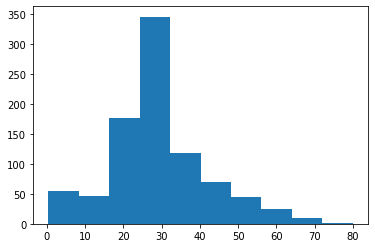

In [15]:
ages = train_df['Age']
plt.hist(ages)

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

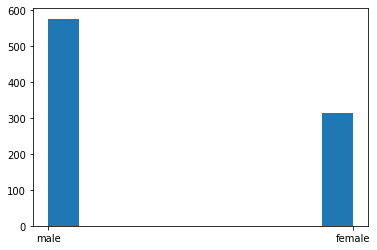

In [16]:
sex = train_df['Sex']
plt.hist(sex)

          Survived    Pclass       Age     SibSp      Fare     Parch
Survived  1.000000 -0.338481 -0.069809 -0.035322  0.257307  0.081629
Pclass   -0.338481  1.000000 -0.331339  0.083081 -0.549500  0.018443
Age      -0.069809 -0.331339  1.000000 -0.232625  0.091566 -0.179191
SibSp    -0.035322  0.083081 -0.232625  1.000000  0.159651  0.414838
Fare      0.257307 -0.549500  0.091566  0.159651  1.000000  0.216225
Parch     0.081629  0.018443 -0.179191  0.414838  0.216225  1.000000


<AxesSubplot:>

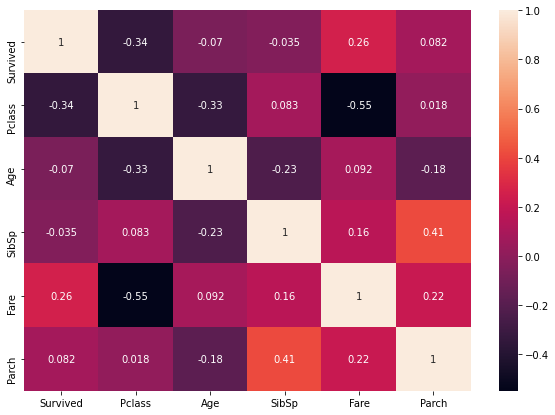

In [17]:
corr_arr = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Fare', 'Parch']].corr()
print(corr_arr)
plt.figure(figsize=(10,7))
sns.heatmap(corr_arr,annot=True)

#### Sex and Embarked columns are one hot encoded:

train_df.head(5)

In [18]:
# get_dummies method selected instead of mapping manual method.
train_df = pd.get_dummies(train_df, columns = ['Sex'])
train_df = pd.get_dummies(train_df, columns = ['Embarked'])

New column creation with Family size

In [19]:
train_df['FamSize'] = train_df['SibSp'] + train_df['Parch']

In [20]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0


In [21]:
X = train_df.drop(columns=['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'])
y = train_df['Survived']


In [22]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()   #(**rfc_params)
rf.fit(X_train, y_train)

rfpred = rf.predict(X_test)

rfscore = accuracy_score(y_test , rfpred)
print('Accuracy Score = ' , rfscore)

Accuracy Score =  0.7982062780269058


In [24]:
svc3 = SVC(kernel='poly' , degree=1)
svc3.fit(X_train , y_train)

pred3 = svc3.predict(X_test)

score3 = accuracy_score(y_test , pred3)

print('Accuracy Score = ' , score3)


Accuracy Score =  0.6636771300448431


Accuracy Score =  0.8116591928251121
Training accuracy 0.9521
Testing accuracy 0.8117


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

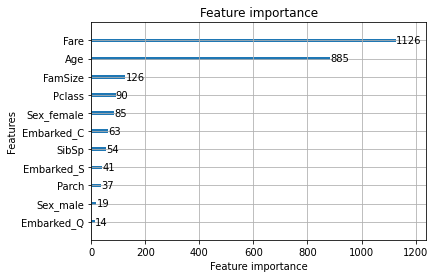

In [25]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

lgbm_model = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbm_model.fit(X_train, y_train)
pred4 = lgbm_model.predict(X_test)
score4 = accuracy_score(y_test , pred4)
print('Accuracy Score = ' , score4)


print('Training accuracy {:.4f}'.format(lgbm_model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(lgbm_model.score(X_test,y_test)))
lgb.plot_importance(lgbm_model)

<AxesSubplot:>

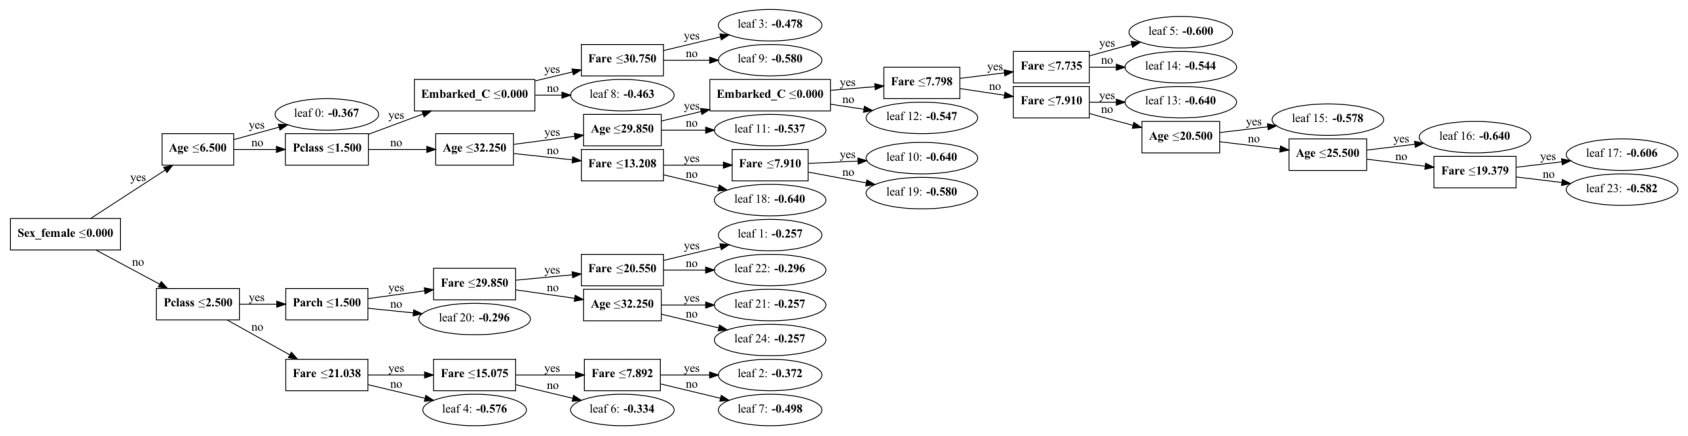

In [26]:
lgb.plot_tree(lgbm_model,figsize=(30,40))

In [27]:
### With perceptron:

In [28]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
acc_perceptron

78.03